# 4. Exploratory Data Analaysis
---

In [32]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset
total_data = pd.read_csv('..\data\interim\player_match_data.csv')

4.0. Creating target variable

For our EDA analysis, we are going to create a categorical target variable called 'winning_team' and consists in a number (0, 1 or 2).
- 0 means draw
- 1 means that team 1 has won the match
- 2 means that team 2 has won the match

In [33]:
# Define a function that calculates the winning team
def get_winning_team(team_1_score, team_2_score):
    if team_1_score == team_2_score:
        return 0
    elif team_1_score > team_2_score:
        return 1
    else:
        return 2

# Apply the function to create the 'winning_team' column
total_data['winning_team'] = total_data.apply(lambda row: get_winning_team(row['team_1_score'], row['team_2_score']), axis=1)

# Target variable
target = 'winning_team'

# Show the first rows
total_data.head(3)

,adr,assists,deaths,fkdiff,hs,kdratio,kills,match_id,player_id,rating,...,team_2_id,team_2_score,map,hour,day,week,month,year,weekday,winning_team
0,163.2,3,10,1,10,90.0%,32,32227,5736,2.44,...,6621,16,Train,13,2,26,7,2016,5,2
1,81.0,3,6,1,5,75.0%,17,32227,2532,1.55,...,6621,16,Train,13,2,26,7,2016,5,2
2,77.6,3,10,1,11,75.0%,16,32227,7382,1.41,...,6621,16,Train,13,2,26,7,2016,5,2


### 4.1. Data description

In [34]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946025 entries, 0 to 946024
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   adr           946025 non-null  object 
 1   assists       946025 non-null  int64  
 2   deaths        946025 non-null  int64  
 3   fkdiff        946025 non-null  int64  
 4   hs            946025 non-null  int64  
 5   kdratio       946025 non-null  object 
 6   kills         946025 non-null  int64  
 7   match_id      946025 non-null  int64  
 8   player_id     946025 non-null  int64  
 9   rating        946025 non-null  float64
 10  data_unix     946025 non-null  int64  
 11  team_1_id     946025 non-null  int64  
 12  team_1_score  946025 non-null  int64  
 13  team_2_id     946025 non-null  int64  
 14  team_2_score  946025 non-null  int64  
 15  map           946025 non-null  object 
 16  hour          946025 non-null  int64  
 17  day           946025 non-null  int64  
 18  week

In [35]:
total_data.head(3)

,adr,assists,deaths,fkdiff,hs,kdratio,kills,match_id,player_id,rating,...,team_2_id,team_2_score,map,hour,day,week,month,year,weekday,winning_team
0,163.2,3,10,1,10,90.0%,32,32227,5736,2.44,...,6621,16,Train,13,2,26,7,2016,5,2
1,81.0,3,6,1,5,75.0%,17,32227,2532,1.55,...,6621,16,Train,13,2,26,7,2016,5,2
2,77.6,3,10,1,11,75.0%,16,32227,7382,1.41,...,6621,16,Train,13,2,26,7,2016,5,2


### 4.2. Null values

the following columns are listed as 'object' and may contain invalid values: adr, kdratio, map

In [36]:
# Convert'adr' and 'kdratio' to numeric columns
total_data['adr'] = pd.to_numeric(total_data['adr'], errors='coerce')
total_data['kdratio'] = pd.to_numeric(total_data['kdratio'].str.rstrip('%'), errors='coerce') / 100.0

In [37]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946025 entries, 0 to 946024
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   adr           815862 non-null  float64
 1   assists       946025 non-null  int64  
 2   deaths        946025 non-null  int64  
 3   fkdiff        946025 non-null  int64  
 4   hs            946025 non-null  int64  
 5   kdratio       815988 non-null  float64
 6   kills         946025 non-null  int64  
 7   match_id      946025 non-null  int64  
 8   player_id     946025 non-null  int64  
 9   rating        946025 non-null  float64
 10  data_unix     946025 non-null  int64  
 11  team_1_id     946025 non-null  int64  
 12  team_1_score  946025 non-null  int64  
 13  team_2_id     946025 non-null  int64  
 14  team_2_score  946025 non-null  int64  
 15  map           946025 non-null  object 
 16  hour          946025 non-null  int64  
 17  day           946025 non-null  int64  
 18  week

After the replacement and data type conversion:
- Column 'adr' has 130.163 null values, a 13.758% of the total entries.
- Column 'kdratio' has 130.037 null values, a 13.745% of the total entries.

In [38]:
total_data['map'].unique()

array(['Train', 'Dust2', 'Dust2_se', 'Cache', 'Mirage', 'Nuke', 'Inferno',
       'Cobblestone', 'Vertigo', 'Overpass', 'Nuke_se', 'Inferno_se',
       'Mirage_ce', 'Train_se', 'Season', 'Mill_ce', 'Tuscan', 'Ancient',
       'Dust_se', 'Train_ve'], dtype=object)

Map has no wrong values.

Next, since the variables 'adr' and 'kdratio' are numeric and both count with a normal distribution, the replacement of the null entries will follow this criteria:
- First, a player's 'adr' or 'kdratio' will be filled with the player's mean of them.
- Second, if there is no info to fill the nan, the general mean will be used to fill the remanent rows.


In [39]:
# Group by 'player_id' and fill NaN values in each player's 'adr' column with the mean of non-null values for that player
total_data['adr'] = total_data.groupby('player_id')['adr'].transform(lambda x: x.fillna(x[x.notna()].mean()))
total_data['kdratio'] = total_data.groupby('player_id')['kdratio'].transform(lambda x: x.fillna(x[x.notna()].mean()))

# There are players that has no data, fill remaining NaN values in 'adr' column with the mean of the entire 'adr' column
total_data['adr'] = total_data['adr'].fillna(total_data['adr'].mean())
total_data['kdratio'] = total_data['kdratio'].fillna(total_data['kdratio'].mean())

In [40]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946025 entries, 0 to 946024
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   adr           946025 non-null  float64
 1   assists       946025 non-null  int64  
 2   deaths        946025 non-null  int64  
 3   fkdiff        946025 non-null  int64  
 4   hs            946025 non-null  int64  
 5   kdratio       946025 non-null  float64
 6   kills         946025 non-null  int64  
 7   match_id      946025 non-null  int64  
 8   player_id     946025 non-null  int64  
 9   rating        946025 non-null  float64
 10  data_unix     946025 non-null  int64  
 11  team_1_id     946025 non-null  int64  
 12  team_1_score  946025 non-null  int64  
 13  team_2_id     946025 non-null  int64  
 14  team_2_score  946025 non-null  int64  
 15  map           946025 non-null  object 
 16  hour          946025 non-null  int64  
 17  day           946025 non-null  int64  
 18  week

4.3. Graphic

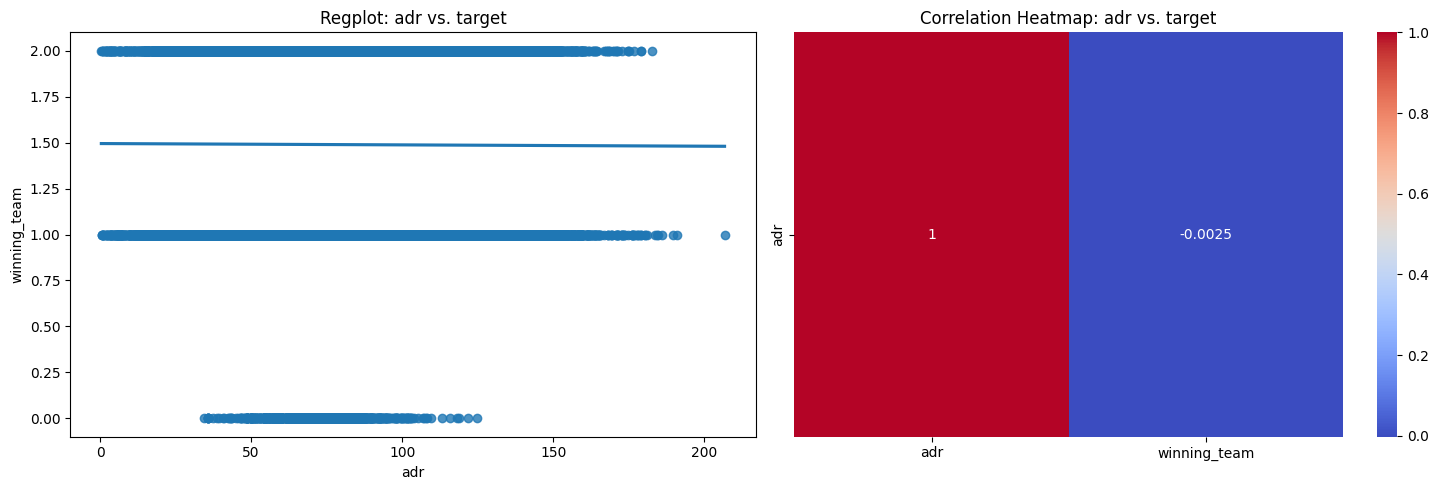

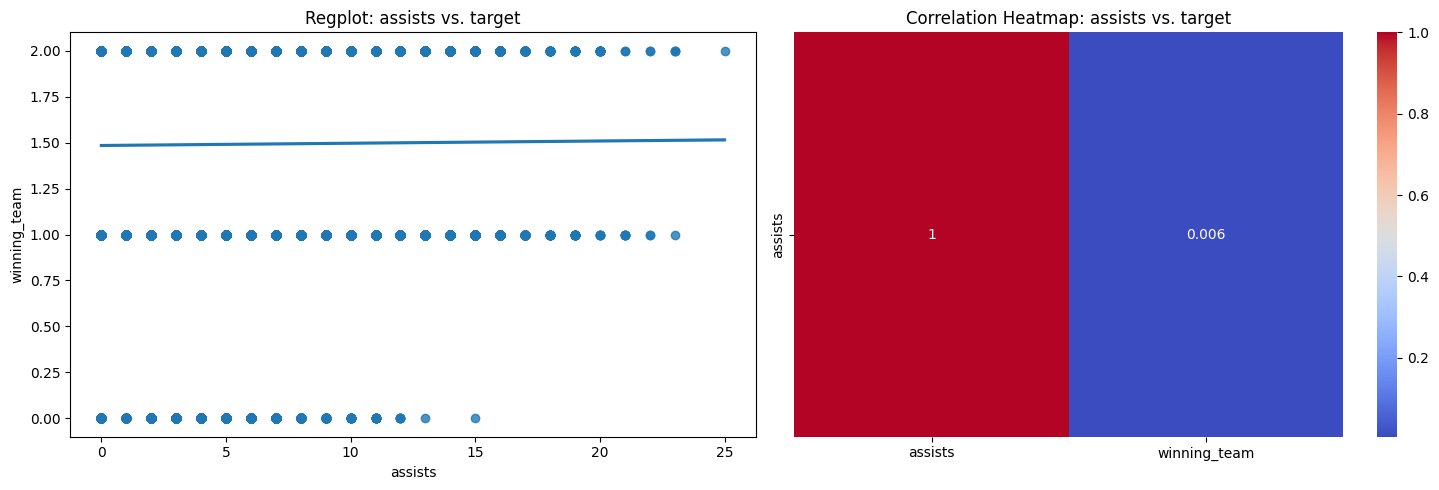

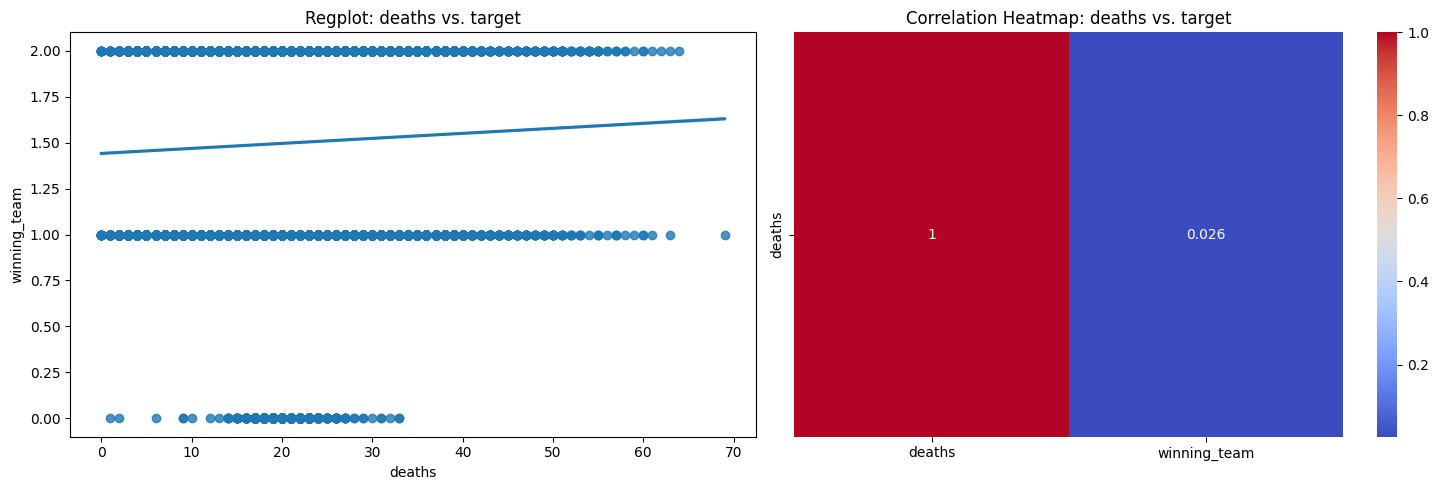

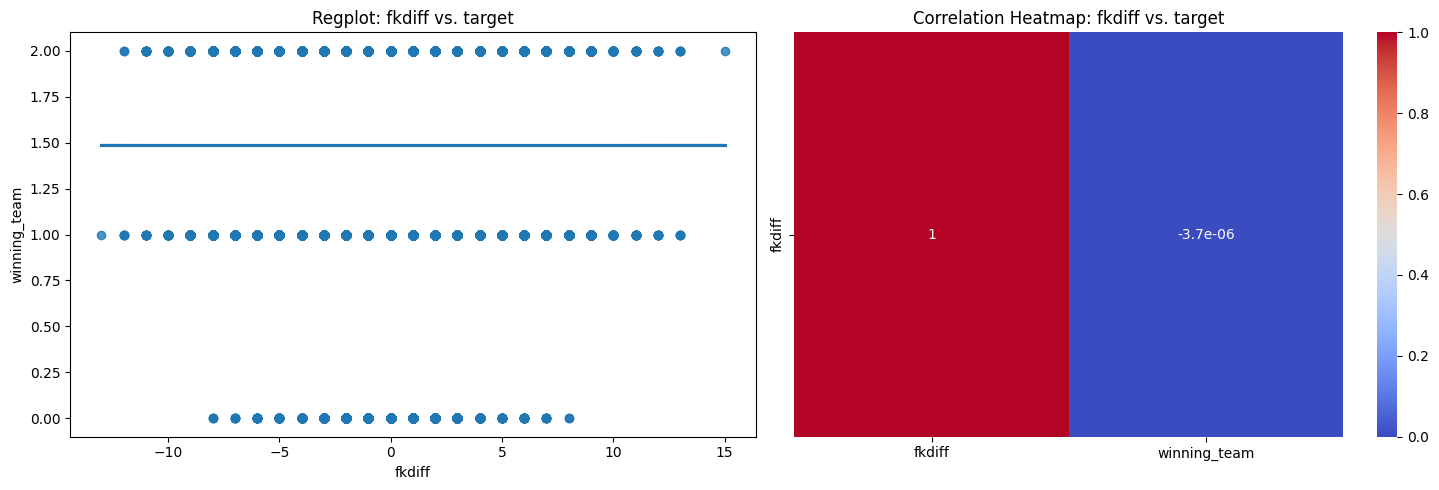

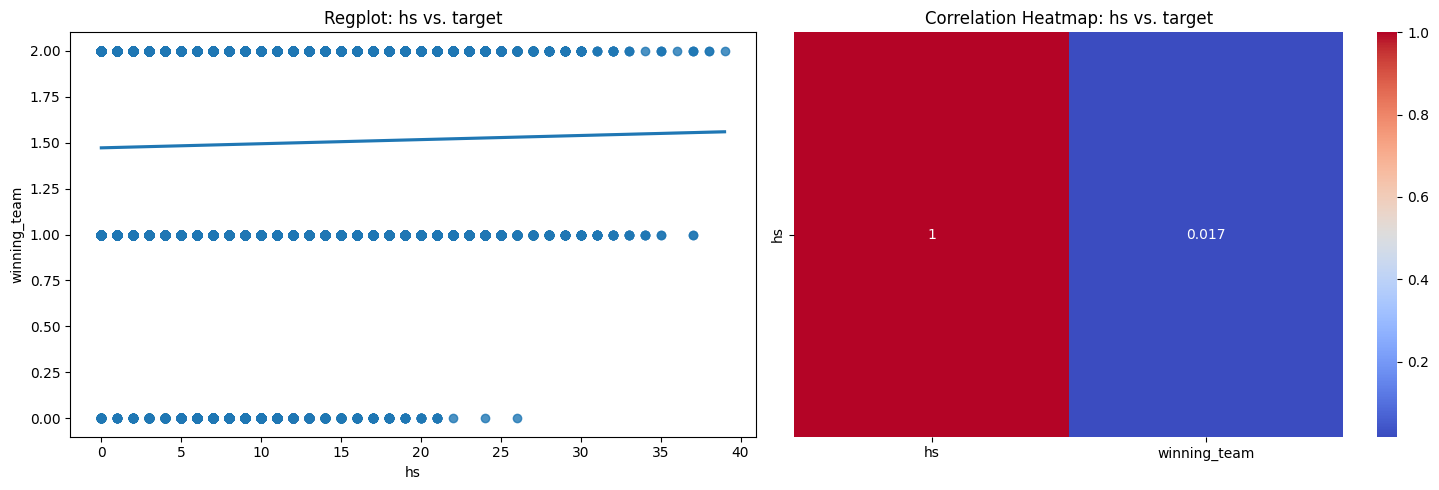

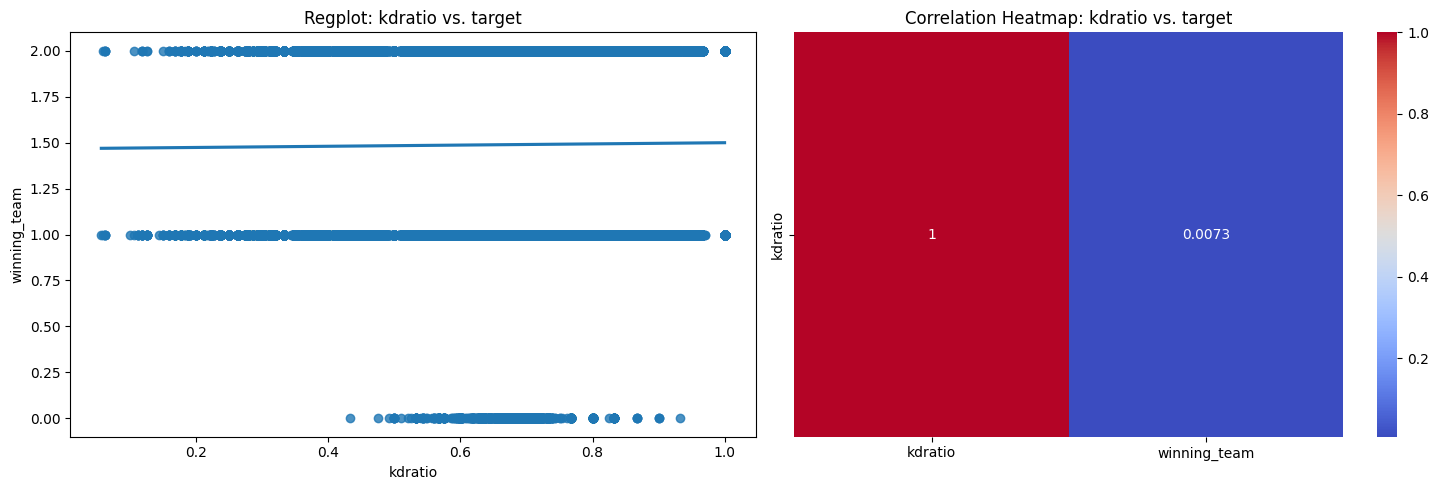

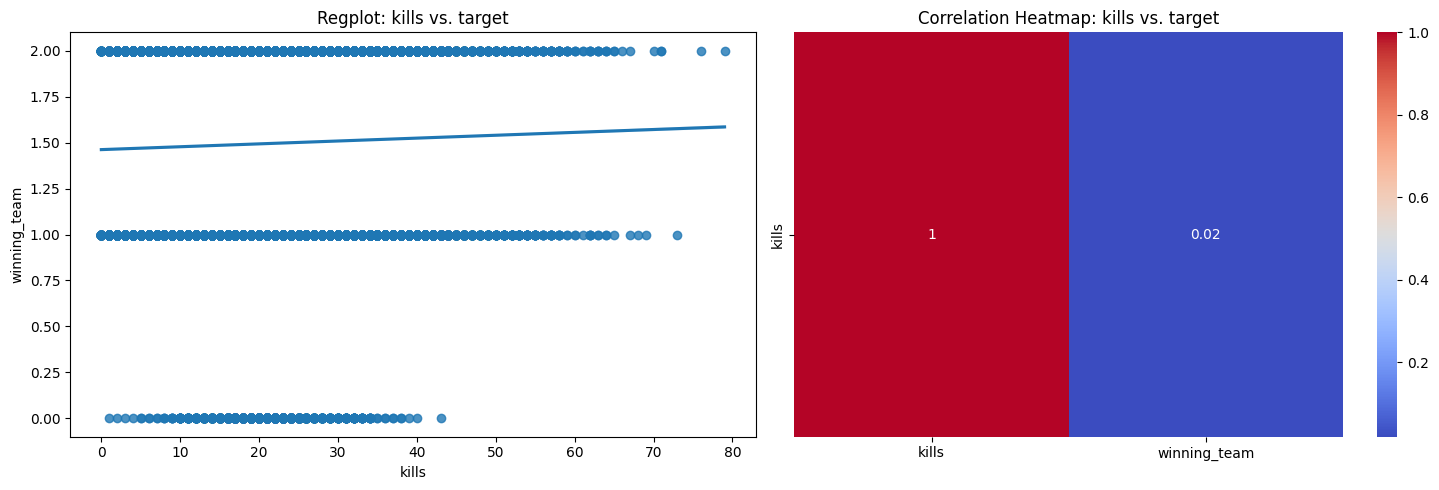

In [42]:
# Select the columns that are important for graphic
numeric_variables = ['adr', 'assists', 'deaths', 'fkdiff', 'hs', 'kdratio', 'kills']

for column in total_data[numeric_variables]:
    # Setting up the subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    # Regression plot
    sns.regplot(x=column, y=target, data=total_data, ax=axes[0])
    axes[0].set_title(f'Regplot: {column} vs. target')

    # Heatmap of correlation
    sns.heatmap(total_data[[column, target]].corr().iloc[0:1, :], annot=True, cmap='coolwarm', ax=axes[1])
    axes[1].set_title(f'Correlation Heatmap: {column} vs. target')

    # Show the plot for each column
    plt.tight_layout()
    plt.show()

Comentario> Es posible que mejore la correlacion si en vez de tener como target que equipo gano tenemos si el equipo del jugador gano

0   adr           946025 non-null  object 
 1   assists       946025 non-null  int64  
 2   deaths        946025 non-null  int64  
 3   fkdiff        946025 non-null  int64  
 4   hs            946025 non-null  int64  
 5   kdratio       946025 non-null  object 
 6   kills         946025 non-null  int64  
 7   match_id      946025 non-null  int64  
 8   player_id     946025 non-null  int64  
 9   rating        946025 non-null  float64
 10  data_unix     946025 non-null  int64  
 11  team_1_id     946025 non-null  int64  
 12  team_1_score  946025 non-null  int64  
 13  team_2_id     946025 non-null  int64  
 14  team_2_score  946025 non-null  int64  
 15  map           946025 non-null  object 
 16  hour          946025 non-null  int64  
 17  day           946025 non-null  int64  
 18  week          946025 non-null  int64  
 19  month         946025 non-null  int64  
...
 21  weekday       946025 non-null  int64  
 22  winning_team  946025 non-null  int64 

In [50]:
reduced_df = ['player_id','adr','assists', 'deaths', 'fkdiff', 'hs', 'kdratio', 'kills', 'match_id',
            'team_1_id','team_1_score','team_2_id','team_2_score','map','winning_team']
total_data[reduced_df].head(10)

,player_id,adr,assists,deaths,fkdiff,hs,kdratio,kills,match_id,team_1_id,team_1_score,team_2_id,team_2_score,map,winning_team
0,5736,163.2,3,10,1,10,0.90,32,32227,6619,4,6621,16,Train,2
1,2532,81.0,3,6,1,5,0.75,17,32227,6619,4,6621,16,Train,2
2,7382,77.6,3,10,1,11,0.75,16,32227,6619,4,6621,16,Train,2
3,5698,77.0,2,10,-1,6,0.85,14,32227,6619,4,6621,16,Train,2
4,10563,61.2,4,12,4,4,0.85,10,32227,6619,4,6621,16,Train,2
5,2492,67.8,2,16,-2,7,0.55,12,32227,6619,4,6621,16,Train,2
6,11247,81.8,0,19,-2,6,0.50,13,32227,6619,4,6621,16,Train,2
7,10814,77.7,1,20,1,5,0.55,12,32227,6619,4,6621,16,Train,2
8,5737,43.0,0,17,-1,4,0.50,8,32227,6619,4,6621,16,Train,2
9,168,23.3,1,17,-2,2,0.25,3,32227,6619,4,6621,16,Train,2
